<a href="https://colab.research.google.com/github/saurabh-1991/DeepLearning-Algorithms/blob/master/LSTM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Input Required Libraries
from math import sqrt
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense,Dropout
from keras.layers import LSTM

In [ ]:
# Read in data and display first 5 rows
features = pd.read_csv('Dataset2.csv')
print('The shape of our features is:', features.shape)
features.head(5)
X = features.iloc[:,1:-4]
Y = features.iloc[:,-4:]
# Scaling the dataset to fit the model
sc = StandardScaler()
X_scale = sc.fit_transform(X)
# Dividing the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size = 0.20)

The shape of our features is: (114627, 16)


In [ ]:
y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()
print(f"\nShape of X_train:-{X_train.shape} Type -{type(X_train)}")
print(f"\nShape of y_train:-{y_train.shape} Type -{type(y_train)}")
print("\nShape of X_test:-",X_test.shape)
print("\nShape of y_test:-",y_test.shape)
#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()
#print(f"\nShape of y_train_Conv:-{y_train.shape} Type -{type(y_train)}")


Shape of X_train:-(91701, 11) Type -<class 'numpy.ndarray'>

Shape of y_train:-(91701, 4) Type -<class 'numpy.ndarray'>

Shape of X_test:- (22926, 11)

Shape of y_test:- (22926, 4)


In [ ]:
#making Data compatible with LSTM
x_train = X_train.reshape(-1, 1, 11)
x_test  = X_test.reshape(-1, 1, 11)
Y_train = y_train.reshape(-1,1,4)
Y_test = y_test.reshape(-1, 1, 4)

print("\nShape of X_train:-",x_train.shape)
print("\nShape of Y_train:-",Y_train.shape)
print("\nShape of X_test:-",x_test.shape)
print("\nShape of Y_test:-",Y_test.shape)


Shape of X_train:- (91701, 1, 11)

Shape of Y_train:- (91701, 1, 4)

Shape of X_test:- (22926, 1, 11)

Shape of Y_test:- (22926, 1, 4)


**Model Architecture**

Define the LSTM with 100 neurons in the first hidden layer and 1 neuron in the output layer for predicting Global_active_power. The input shape will be 1 time step with 11 features.
Dropout 20%.
Use the MSE loss function and the efficient Adam version of stochastic gradient descent.
The model will be fit for 200 training epochs with a batch size of 50.

In [ ]:
# design network
model = Sequential()
model.add(LSTM(100,return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]),))
model.add(Dropout(0.5))
# model.add(LSTM(20,return_sequences=False))
# model.add(Dropout(0.5))
model.add(Dense(4))
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
#Save Weights and Model
checkpoint_filepath = '/content/drive/MyDrive/LSTM_Project/firstModel.hdf5'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_accuracy',
    mode='max',
    save_best_only=True)
# fit network
history = model.fit(x_train, Y_train, epochs=200,batch_size=50,
                    validation_data=(x_test,Y_test),
                    callbacks=[model_checkpoint_callback],verbose=1)
model.load_weights(checkpoint_filepath)
model.summary()

Epoch 1/200
1835/1835 [==============================] - 9s 4ms/step - loss: 8.6361 - accuracy: 0.3352 - val_loss: 1.2771 - val_accuracy: 0.7108
Epoch 2/200
1835/1835 [==============================] - 7s 4ms/step - loss: 3.3628 - accuracy: 0.4073 - val_loss: 1.2480 - val_accuracy: 0.7141
Epoch 3/200
1835/1835 [==============================] - 7s 4ms/step - loss: 3.1483 - accuracy: 0.5734 - val_loss: 1.1559 - val_accuracy: 0.7146
Epoch 4/200
1835/1835 [==============================] - 7s 4ms/step - loss: 2.8795 - accuracy: 0.6922 - val_loss: 1.2007 - val_accuracy: 0.7147
Epoch 5/200
1835/1835 [==============================] - 7s 4ms/step - loss: 2.6652 - accuracy: 0.7182 - val_loss: 1.1715 - val_accuracy: 0.7146
Epoch 6/200
1835/1835 [==============================] - 7s 4ms/step - loss: 2.5229 - accuracy: 0.7180 - val_loss: 1.1849 - val_accuracy: 0.7206
Epoch 7/200
1835/1835 [==============================] - 7s 4ms/step - loss: 2.4307 - accuracy: 0.7198 - val_loss: 1.1836 - val_ac

In [ ]:
#Accuracy
#print("\nModel Accuracy = "history.history['accuracy'])
import numpy as np
best_model_accuracy = history.history['accuracy'][np.argmin(history.history['loss'])]
print("Model Best Accuracy =",best_model_accuracy)

Model Best Accuracy = 0.7124350070953369


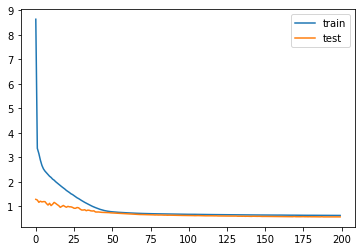

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make predictions
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
print("trainPredict = ",trainPredict.shape)
print("\ntestPredict = ",testPredict.shape)



trainPredict =  (91701, 1, 4)

testPredict =  (22926, 1, 4)


In [ ]:
print("trainPredict Type - ",type(trainPredict))
print("testPredict Type - ",type(trainPredict))
y_pred_train = trainPredict.reshape(-1,4)
y_pred_test = testPredict.reshape(-1,4)
print("y_pred_train  - ",y_pred_train.shape)
print("testPredict  - ",y_pred_test.shape)

trainPredict Type -  <class 'numpy.ndarray'>
testPredict Type -  <class 'numpy.ndarray'>
y_pred_train  -  (91701, 4)
testPredict  -  (22926, 4)


In [ ]:
from sklearn import metrics
print("R2 score:", metrics.r2_score(y_test, y_pred_test))
print("R2 score:", metrics.r2_score(y_train, y_pred_train))

R2 score: 0.44703779822863626
R2 score: 0.4404734168983751


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
MAE_test = mae(y_test, y_pred_test)
MAE_train = mae(y_train, y_pred_train)
print(f"MAE - Test ={MAE_test}\nMAE - Train ={MAE_train}")

MAE - Test =0.56009115783443
MAE - Train =0.5612444765743427


In [ ]:
y_test

array([[31.9390624, 32.9224336, 32.176928 , 32.5221232],
       [32.7889968, 32.699072 , 33.4880896, 33.0007552],
       [32.8412112, 32.6207504, 33.4880896, 32.9688464],
       ...,
       [29.4617792, 29.2703264, 29.5836128, 29.3747552],
       [32.7338816, 32.5656352, 33.4010656, 32.8035008],
       [32.0144832, 32.8122032, 32.2378448, 32.4728096]])

In [ ]:
y_pred_test

array([[32.205364, 32.794266, 32.494926, 32.604702],
       [32.82759 , 32.61466 , 33.523373, 32.90305 ],
       [32.684235, 32.639996, 33.315838, 32.825794],
       ...,
       [31.305182, 32.45251 , 31.15049 , 32.023228],
       [31.828745, 32.35096 , 32.011654, 32.237072],
       [32.0456  , 32.79992 , 32.2786  , 32.48357 ]], dtype=float32)